### 행정구역 정보 분석 및 시각화
1. pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기
2. Data Selection : loc[] / iloc[] 를 사용해서 특정 Row와 Column 선택하기
3. 컬럼명 변경하기
4. DataFrame 객체를 Excel file로 저장하기
5. Data Grouping : groupby() 함수를 사용해서 그룹핑하기
6. 상관관계 분석 : corr() 함수를 사용해서 인구수와 면적간의 상관관계 
7. 시각화 : seaborn의 barplot() 함수를 사용해서 Plot 그리기

In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


##### pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기

In [2]:
data = pd.read_csv('data/data_draw_korea.csv')
print(data.shape)
print(type(data))

(229, 8)
<class 'pandas.core.frame.DataFrame'>


In [3]:
# head() 함수
data.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [4]:
# tail() 함수
data.tail()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [6]:
# sample() 함수
data.sample(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
97,97,178203,대구달성,9,15,427.03,대구광역시,달성군
136,136,364232,서울마포,5,4,23.87,서울특별시,마포구
129,129,342909,서울광진,7,6,17.05,서울특별시,광진구


In [8]:
# 컬렴명 확인하기
print(f'컬럼명 = {data.columns}')
# 인덱스 확인하기
print(f'인덱스 = {data.index}')

컬럼명 = Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
인덱스 = RangeIndex(start=0, stop=229, step=1)


In [9]:
# values 속성으로 값과 타입 확인하기
print(type(data.values))
data.values

<class 'numpy.ndarray'>


array([[0, 202520, '강릉', ..., 1040.07, '강원도', '강릉시'],
       [1, 25589, '고성(강원)', ..., 664.19, '강원도', '고성군'],
       [2, 86747, '동해', ..., 180.01, '강원도', '동해시'],
       ...,
       [226, 62809, '진천', ..., 406.08, '충청북도', '진천군'],
       [227, 790216, '청주', ..., 932.51, '충청북도', '청주시'],
       [228, 198077, '충주', ..., 983.7, '충청북도', '충주시']],
      shape=(229, 8), dtype=object)

In [10]:
# info() 함수
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [15]:
# 모든 컬럼의 타입 확인

data.dtypes

Unnamed: 0      int64
인구수             int64
shortName      object
x               int64
y               int64
면적            float64
광역시도           object
행정구역           object
dtype: object

In [19]:
# 면적 컬럼의 타입을 확인
print(type(data['면적']))
data['면적'].dtype

<class 'pandas.core.series.Series'>


dtype('float64')

In [18]:
# 특정컬럼(인구수)의 타입 확인
data['인구수'].dtype

dtype('int64')

In [20]:
# describe() 함수, 숫자 타입인 컬럼의 통계함수 출력
data.describe()


,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [21]:
#numpy에 np.number 속성을 사용해서 describe함수 출력
import numpy as np
data.describe(include=np.number)


,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [24]:
# describe() 함수, 문자열(object) 타입인 컬럼의 통계함수 출력

data.describe(include=object)


,shortName,광역시도,행정구역
count,229,229,229
unique,229,17,206
top,강릉,경기도,동구
freq,1,31,6


In [ ]:
# data['행정구역'] == '동구'
data['행정구역'] == '동구'

0      False
1      False
2      False
3      False
4      False
       ...  
224    False
225    False
226    False
227    False
228    False
Name: 행정구역, Length: 229, dtype: bool

In [28]:
# 해당 조건식과 매칭되는 Row data 출력
data.loc[data['행정구역'] == '동구']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
92,92,97571,광주동구,3,20,48.86,광주광역시,동구
98,98,330830,대구동구,11,13,182.35,대구광역시,동구
104,104,236524,대전동구,5,13,136.80,대전광역시,동구
112,112,85952,부산동구,10,17,9.77,부산광역시,동구
151,151,164738,울산동구,12,14,35.77,울산광역시,동구
159,159,68950,인천동구,1,5,7.05,인천광역시,동구


In [30]:
# '광역시도' == '경기도'
data.loc[data['광역시도'] == '경기도'].reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,18,53497,가평,9,3,843.040,경기도,가평군
1,19,955384,고양,4,2,267.330,경기도,고양시
2,20,63227,과천,7,7,35.813,경기도,과천시
3,21,327111,광명,3,3,38.500,경기도,광명시
4,22,290210,광주,8,7,431.840,경기도,광주시
5,23,175676,구리,9,4,33.300,경기도,구리시
6,24,273302,군포,5,8,36.350,경기도,군포시
7,25,326523,김포,2,3,276.640,경기도,김포시
8,26,610300,남양주,8,3,458.440,경기도,남양주시
9,27,90398,동두천,7,2,95.680,경기도,동두천시


In [32]:
# describe() 함수, 모든 컬럼의 통계함수 출력
data.describe(include='all')

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
count,229.000000,2.290000e+02,229,229.000000,229.000000,229.000000,229,229
unique,NaN,NaN,229,NaN,NaN,NaN,17,206
top,NaN,NaN,강릉,NaN,NaN,NaN,경기도,동구
freq,NaN,NaN,1,NaN,NaN,NaN,31,6
mean,114.000000,2.110898e+05,NaN,6.117904,11.262009,435.419795,NaN,NaN
std,66.250786,2.074378e+05,NaN,3.320469,6.040898,381.612549,NaN,NaN
min,0.000000,8.392000e+03,NaN,0.000000,0.000000,2.800000,NaN,NaN
25%,57.000000,4.955900e+04,NaN,3.000000,6.000000,54.000000,NaN,NaN
50%,114.000000,1.401590e+05,NaN,6.000000,11.000000,436.400000,NaN,NaN
75%,171.000000,3.216180e+05,NaN,9.000000,16.000000,692.800000,NaN,NaN


### Data Selection
* loc[] 또는 iloc[]
* loc[Row 선택, Column 선택]

In [ ]:
# 인구수 1개의 컬럼 선택
data['인구수']

In [ ]:
data.loc[:,'인구수']

In [ ]:
# ['행정구역','인구수','면적'] 컬럼의 데이터 출력
data[['행정구역','인구수','면적']]


In [40]:
data.loc[0:3,['행정구역','인구수','면적']]

,행정구역,인구수,면적
0,강릉시,202520,1040.07
1,고성군,25589,664.19
2,동해시,86747,180.01
3,삼척시,63986,1185.80


In [41]:
# 인구수 컬럼의 집계함수
print(f"인구수 최대값 {data['인구수'].max():,}")
print(f"인구수 최소값 {data['인구수'].min():,}")
print(f"인구수 평균 {round(data['인구수'].mean()):,}")
print(f"인구수 표준편차 {round(data['인구수'].std()):,}")
print(f"인구수 중간값 {data['인구수'].median():,}")
data['인구수'].quantile([0.25, 0.75])

인구수 최대값 1,125,461
인구수 최소값 8,392
인구수 평균 211,090
인구수 표준편차 207,438
인구수 중간값 140,159.0


0.25     49559.0
0.75    321618.0
Name: 인구수, dtype: float64

In [42]:
# 인구수가 가장 많은 행정구역?
# 인구수의 최대값을 max_population 변수에 저장
max_popu = data['인구수'].max()
print(max_popu)
#data['인구수'] == max_popu
data.loc[data['인구수'] == max_popu]

1125461


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [44]:
# 면적이 넓은 행정구역?
data.loc[data['면적'] == data['면적'].max()]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
15,15,62957,홍천,10,4,1817.94,강원도,홍천군


In [46]:
# 인구수가 가장 적은 행정구역?
data.loc[data['인구수'] == data['인구수'].min()]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
83,83,8392,울릉,13,6,72.82,경상북도,울릉군


In [48]:
# unique한 광역시도명
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [49]:
# 광역시도별 Row Counting
data['광역시도'].value_counts()

광역시도
경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [53]:
# data['광역시도'] == '경기도' 의 ['행정구역','인구수','면적']  컬럼의 데이터 출력하기
data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']]

,행정구역,인구수,면적
18,가평군,53497,843.040
19,고양시,955384,267.330
20,과천시,63227,35.813
21,광명시,327111,38.500
22,광주시,290210,431.840
23,구리시,175676,33.300
24,군포시,273302,36.350
25,김포시,326523,276.640
26,남양주시,610300,458.440
27,동두천시,90398,95.680


In [ ]:
# data['행정구역'] == '경기도' 의 ['행정구역','인구수','면적']  컬럼의 데이터를 면적을 descending 순서대로 출력하기
# 면적이 넓은 순으로 정렬, 인덱스 재설정
data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='면적',ascending=False).reset_index(drop=True)

In [ ]:
#경기도에 속한 행정구역명, 인구수, 면적 선택하기 인구수를 descending 순서대로 출력하고 index reset 하여 gy_df 라는 변수에 저장하기
#data.loc[row , col]
gy_df = data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='인구수',ascending=False)
gy_df.head()

In [63]:
# 인구수2 라는 새로운 컬럼을 생성
gy_df['인구수2']=gy_df['인구수'].map(lambda val: f"{val:,}")
gy_df[['인구수','인구수2']].head()

,인구수,인구수2
30,1125461,"1,125,461"
19,955384,"955,384"
40,915005,"915,005"
29,911628,"911,628"
28,805473,"805,473"


In [ ]:
gy_df['면적2']=gy_df['면적'].map('{:.1f}'.format)
gy_df[['면적','면적2']].head()

In [81]:
# 면적이 > 1000 큰 조건과 매핑되는 새로운 DataFrame 생성 area_1000 라는 변수에 저장하기
# 컬럼명은 ['행정구역','인구수','면적']
area_1000 = data.loc[data['면적'] > 1000, ['행정구역','인구수','면적']].sort_values(by='인구수',ascending=False).reset_index()
# area_1000 DataFrame 객체에 면적2 컬럼을 생성
area_1000['면적2']=area_1000['면적'].map('{:.1f}'.format)
area_1000[['면적','면적2']].head()

,면적,면적2
0,1127.00,1127.0
1,1116.35,1116.3
2,1323.85,1323.8
3,1040.07,1040.1
4,1519.00,1519.0


In [ ]:
area_1000 = data.loc[data['면적'] > 1000].copy().sort_values(by='면적',ascending=False)
area_1000.loc[:,'면적2'] = area_1000['면적'].map('{:,}'.format)
area_1000[['면적','면적2','행정구역','인구수']].head()

,면적,면적2,행정구역,인구수
15,1817.94,"1,817.94",홍천군,62957
9,1646.08,"1,646.08",인제군,29260
77,1519.00,"1,519.0",안동시,157317
14,1463.65,"1,463.65",평창군,38439
68,1323.85,"1,323.85",경주시,242618


In [109]:
#면적 컬럼이 1500이상인 면적3을 만들어라
area_1000.loc[area_1000['면적']>1500,'면적3'] = area_1000['면적'].map('{:,}'.format)
area_1000[['면적','면적2','면적3']].head()

,면적,면적2,면적3
15,1817.94,"1,817.94","1,817.94"
9,1646.08,"1,646.08","1,646.08"
77,1519.00,"1,519.0","1,519.0"
14,1463.65,"1,463.65",NaN
68,1323.85,"1,323.85",NaN


In [112]:
#경기도 인구수의 평균과 표준편차
print(f'경기도 인구수의 평균 = {gy_df['인구수'].mean()}')
print(f'경기도 인구수의 평균 = {gy_df['인구수'].std()}')

경기도 인구수의 평균 = 378845.48387096776
경기도 인구수의 평균 = 304548.39514203876


In [130]:
#광역시도명을 인자로 받아서 해당 광역시에 속한 행정구역들의 인구수의 평균과 편차 구하기
def pop_mean_std(df, sido_name):
    print(f'{sido_name} 인구수의 평균과 편차')
    sido_df = df.loc[df['광역시도']==sido_name,'인구수':'행정구역'].copy()

    print(f'{sido_name} 인구수의 평균 = {sido_df['인구수'].mean()}')
    print(f'{sido_name} 인구수의 평균 = {sido_df['인구수'].std()}')

In [131]:
pop_mean_std(data,'서울특별시')

서울특별시 인구수의 평균과 편차
서울특별시 인구수의 평균 = 375792.28
서울특별시 인구수의 평균 = 125231.24797500289


In [ ]:
# Unique한 광역시도명 순회하면서  광역시도명을 출력합니다. 
for sido_name in data['광역시도'].unique() :
    pop_mean_std(data,sido_name)

In [135]:
#loc[] 사용
#인덱스가 20 부터 25까지
data.loc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시
25,25,326523,김포,2,3,276.640,경기도,김포시


In [134]:
#iloc[] 사용
#인덱스가 20 부터 24까지
data.iloc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시


In [137]:
#iloc[row index, column index] 사용 
#인덱스가 20 부터 25까지 컬럼이 인구수부터 행정구역 까지
data.iloc[20:25,1:8]

,인구수,shortName,x,y,면적,광역시도,행정구역
20,63227,과천,7,7,35.813,경기도,과천시
21,327111,광명,3,3,38.500,경기도,광명시
22,290210,광주,8,7,431.840,경기도,광주시
23,175676,구리,9,4,33.300,경기도,구리시
24,273302,군포,5,8,36.350,경기도,군포시


In [ ]:
#loc[] 사용
#index가 40,55,60 이고, column이 인구수,광역시도,행정구역
data.loc[[40,55,60],['인구수','광역시도','행정구역']]

In [ ]:
#인덱스가 0인 행 하나만 선택
print(type(data.loc[0]))
data.loc[0]

In [ ]:
#열 하나만 선택
print(type(data['행정구역']))
data['행정구역'].head()

### 컬럼명 변경하기, 컬럼을 인덱스 전환하기
* rename() 함수
* inPlace=False (default) 원본 DataFrame객체를 변경하지 않고, 변경한 결과만 출력한다.
* inPlace=True 원본 DataFrame객체를 변경하고, 변경한 결과는 출력하지 않는다.

In [150]:
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [149]:
# 'Unnamed: 0' 컬럼명을 'seq' 로 변경한다. 원본 객체는 변경되지 않고 변경된 결과만 출력함
data.rename(columns={'Unnamed: 0':'seq'},inplace=False)

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...,...
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시


In [155]:
#원본 객체가 변경되고 변경된 결과는 출력하지 않는다.
data.rename(columns={'Unnamed: 0':'seq'},inplace=True)
data.columns

Index(['seq', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [ ]:
# seq 컬럼을 인덱스로 변경한다 set_index( 원본 객체가 변경되지않도록 )
data.set_index('seq',inplace=False)

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [ ]:
#seq 컬럼을 인덱스로 변경, 원복객체가 변경되게
data.set_index('seq',inplace=True)

In [165]:
data.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


### DataFrame을 Excel file로 저장하기
* 인구수가 평균보다 작은 행정구역, 광역시도, 인구수를 선택해서 DataFrame생성하기
* DataFrame의 to_excel() 함수 사용

In [171]:
# 인구수의 평균값 구하기
pop_mean_value=data['인구수'].mean()
print(pop_mean_value)
print(round(pop_mean_value))
print(f'{pop_mean_value:.2f}')

211089.77729257641
211090
211089.78


In [172]:
# 인구수의 평균값보다 작은 Row를 선택하고, '광역시도','행정구역','인구수' 컬럼값을 가져오기
# 정렬할때 광역시도는 ascending으로 , 인구수는 descending
pop_mean_lt_df = data.loc[data['인구수'] < pop_mean_value, ['광역시도','행정구역','인구수']]\
.sort_values(by=['광역시도','인구수'],ascending=[True,False])\
.reset_index(drop=True)

print(pop_mean_lt_df.shape)

(141, 3)


In [173]:
# DataFrame의 to_excel() 함수를 사용하여 excel 파일로 저장
pop_mean_lt_df.to_excel('data/평균인구수미만행정구역.xlsx')


### GroupBy 기능 사용하기
* 광역시도별 행정구역의 인구수 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다.
* Series 객체의 groupby(data['광역시도']) 함수는 컬럼의 값을 인자로 전달하고
* DataFrame 객체의 groupby('광역시도') 함수는 컬럼명을 인자로 전달합니다.

In [ ]:
# Series 객체 사용 - 광역시도별 인구수의 합계 
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum()

In [ ]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 
# DataFrameGroupBy object
data.groupby('광역시도').sum(numeric_only=True)

In [ ]:
# DataFrameGroupBy 
data.groupby('광역시도')['인구수'].sum()

In [ ]:
# 광역시도별 행정구역별 인구수의 합계
data.groupby(['광역시도','행정구역'])['인구수'].sum(numeric_only=True)

In [186]:
# data/광역시도별행정구역별인구수의합계.xlsx 파일로 저장하기
group_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()
group_df.to_excel('data/광역시도별행정구역별인구수합계.xlsx',sheet_name='인구수합계')

### 엑셀 수치 데이터에 콤마찍기
[pandas.ExcelWriter](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)

In [ ]:
%pip install xlsxwriter

In [189]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
group_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.close() #_save()

#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 살펴보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수는 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [ ]:
#전국의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

In [ ]:
#서울의 면적과 인구수의 상관계수 구하기
seoul_df = data.loc[data['광역시도']=='서울특별시',['행정구역','인구수','면적']]
seoul_df['면적'].corr(seoul_df['인구수'])

np.float64(0.6644268188909778)

In [195]:
#경기도의 면적과 인구수의 상관계수 구하기
seoul_df['면적'].corr(seoul_df['인구수'])
gy_df['면적'].corr(gy_df['인구수'])

np.float64(-0.21572485071590813)

In [ ]:
for sido_name in data['광역시도'].unique():
    print(f'{sido_name} 인구수 간의 상관계수 = ')
    sido_df = data.loc[data['광역시도'] == sido_name,['행정구역','인구수','면적']]
    print(sido_df['면적'].corr(sido_df['인구수']))    

#### Groupby 한 DataFrame에 집계함수를 여러개 설정하기
* agg() 함수
* agg(['max','mean','std'])

In [ ]:
# agg() 함수 사용하여 여러개의 통계함수를 사용합니다. 
# fillna(0) NaN 을 0 으로 변경해 줌
data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0)

In [252]:
# agg() 함수 사용 - 그룹핑한 데이터를 여러개의 집계함수를 사용해서 새로운 DataFrame 객체 생성하기
group_agg_df=data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0)
group_agg_df.sort_values(by='std',ascending=False)

,max,mean,std
광역시도,,,
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
충청북도,790216,134974.545455,223460.356657
제주특별자치도,430504,287936.500000,201620.892054
인천광역시,527153,276657.500000,199353.596491
대구광역시,584517,297306.250000,174375.394380
전라북도,630708,124217.714286,168327.134821
충청남도,584912,129741.933333,141125.108080
광주광역시,439683,287641.800000,137076.683206


In [ ]:
# DataFrame의 style.format() 함수 사용하기
group_agg_df.style.format('{0:.2f}')


In [ ]:
# 컬럼의 값을 변경하기 map() 함수를 사용하여 포맷하기
group_agg_df['mean'] = group_agg_df['mean'].map('{:.2f}'.format)
group_agg_df['std'] = group_agg_df['std'].map('{:.2f}'.format)

#### 시각화
* %matplotlib inline 설정
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [213]:
%matplotlib inline

In [214]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.10.6
seaborn  0.13.2


In [216]:
# 폰트이름과 폰트파일 정보 출력 list comprehension 
#for font in fm.fontManager.ttflist:
#    print((font.name, font.fname))
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ] # if 'Mal' in font.name 


[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf')]

In [217]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgunbd.ttf'
#font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)

Malgun Gothic


In [218]:
# matplotlib의 rc(run command) 함수를 사용해서 font name(Malgun Gothic) 설정
matplotlib.rc('font',family=font_name)

### Figure, Axes, Plot
* Axes는 Plot이 실제 그려지는 공간
* Figure는 Axes 보다 더 상위의 공간 : Figure을 여러개의 Axes로 분할해서 Plot를 그릴 수 있다
* 비교) Axis는 X 축, Y축
* seaborn의 barplot() 함수(막대그래프) 사용

In [ ]:
seoul_df = data.loc[data['광역시도']=='서울특별시', ['행정구역','인구수','면적']].reset_index(drop=True)
seoul_df

Figure(1800x1200)
Axes(0.125,0.53;0.775x0.35)
Axes(0.125,0.11;0.775x0.35)


<Axes: xlabel='행정구역', ylabel='면적'>

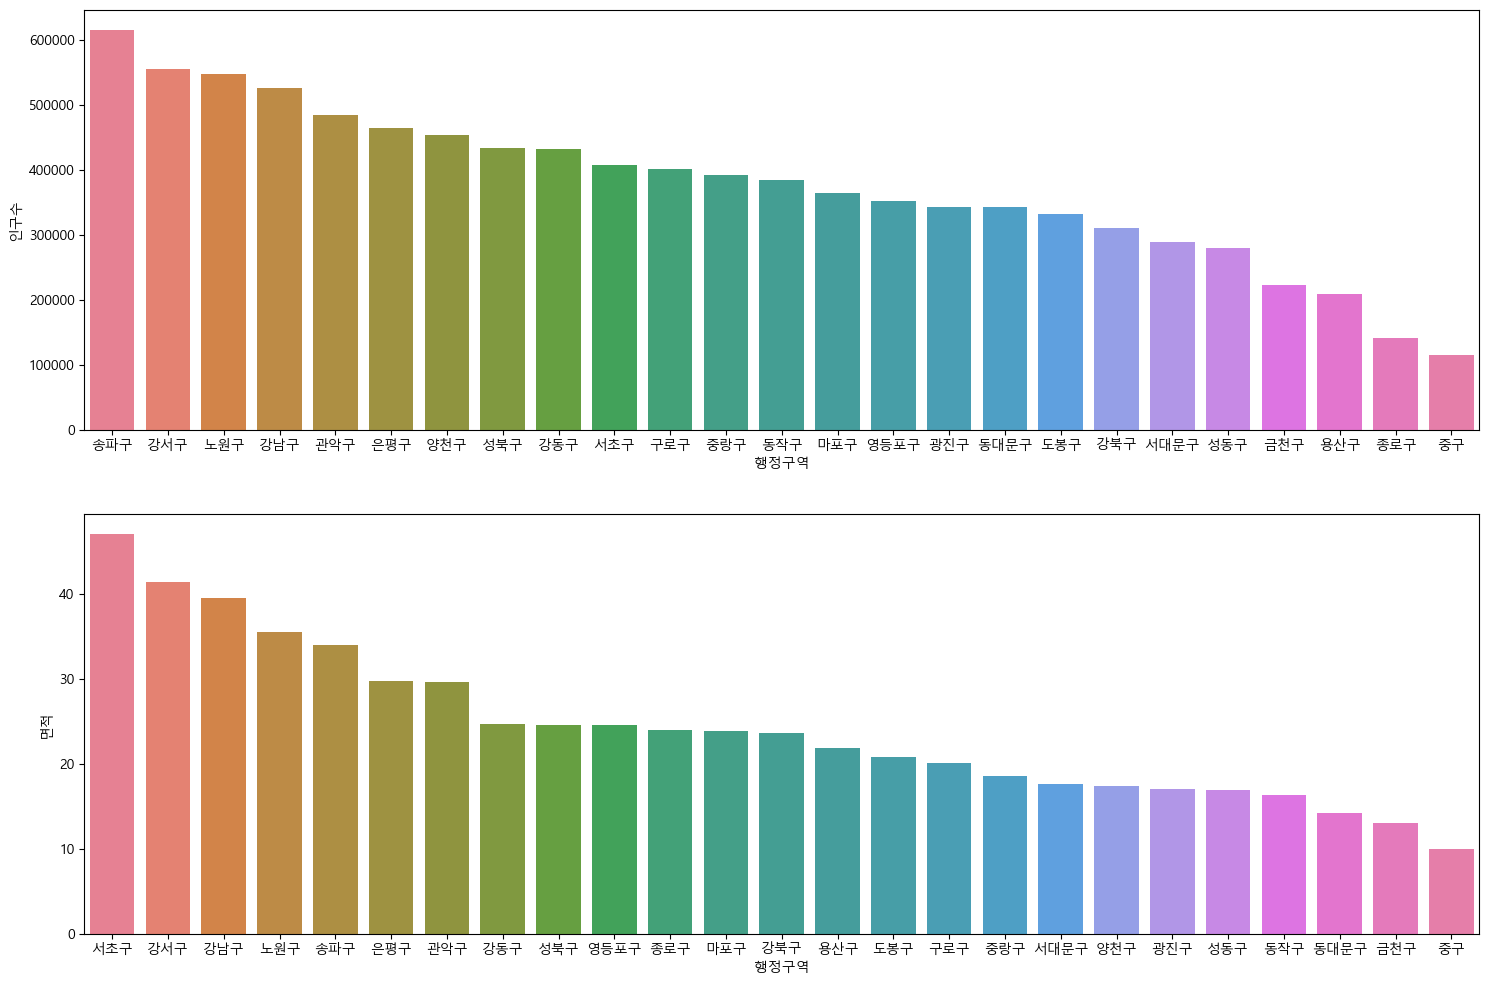

In [ ]:
# subplots() 함수를 사용하여 axes 객체를 생성하기
figure,(axes1,axes2)=plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)
# seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수
sns.barplot(data=seoul_df.sort_values(by='인구수',ascending=False),x='행정구역',y='인구수',ax=axes1,hue='행정구역')
# seaborn의 barplot() 함수 호출하기 - 행정구역과 면적
sns.barplot(data=seoul_df.sort_values(by='면적',ascending=False),x='행정구역',y='면적',ax=axes2,hue='행정구역')
#plt.show()


In [241]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    sido_df = data.loc[data['광역시도']==f'{sido_name}', ['행정구역','인구수','면적']].reset_index(drop=True)
    figure,(axes1,axes2)=plt.subplots(nrows=2,ncols=1)
    figure.set_size_inches(18,12)
    pop_plot = sns.barplot(data=sido_df.sort_values(by='인구수',ascending=False),x='행정구역',y='인구수',ax=axes1,hue='행정구역')
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(data=sido_df.sort_values(by='면적',ascending=False),x='행정구역',y='면적',ax=axes2,hue='행정구역')
    area_plot.set_title(f'{sido_name} 행정구역별 면적')
    

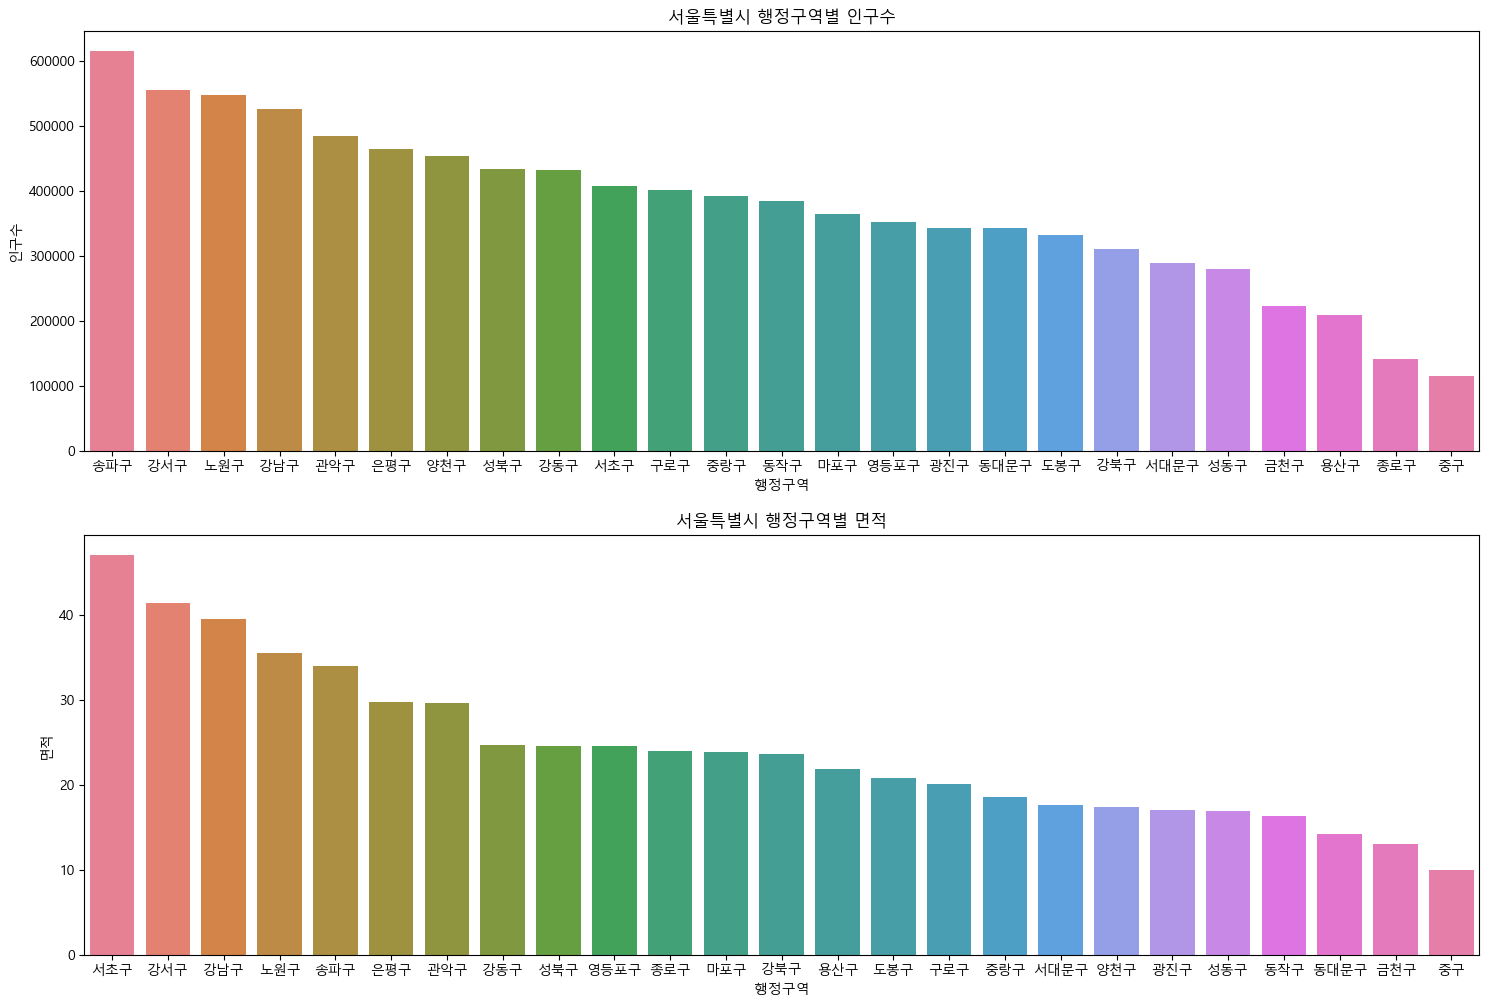

In [249]:
show_pop_area('서울특별시')

<Axes: xlabel='광역시도', ylabel='인구수'>

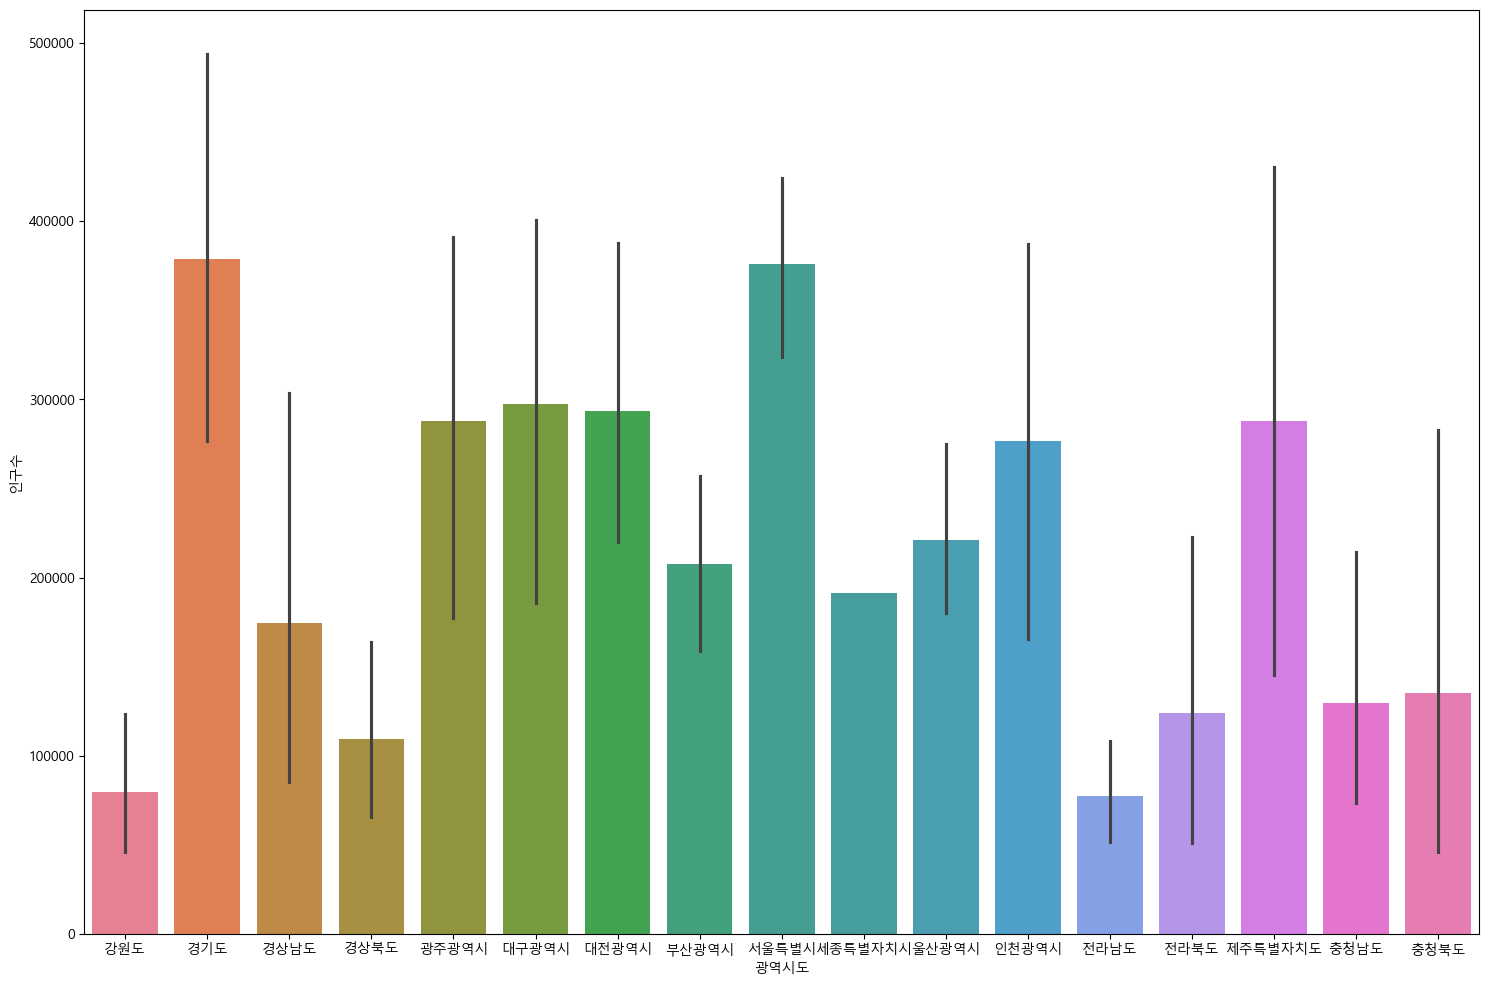

In [250]:
# 전국데이터의 광역시도의 인구수 
figure,axes1=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=data,x='광역시도',y='인구수',ax=axes1,hue='광역시도')

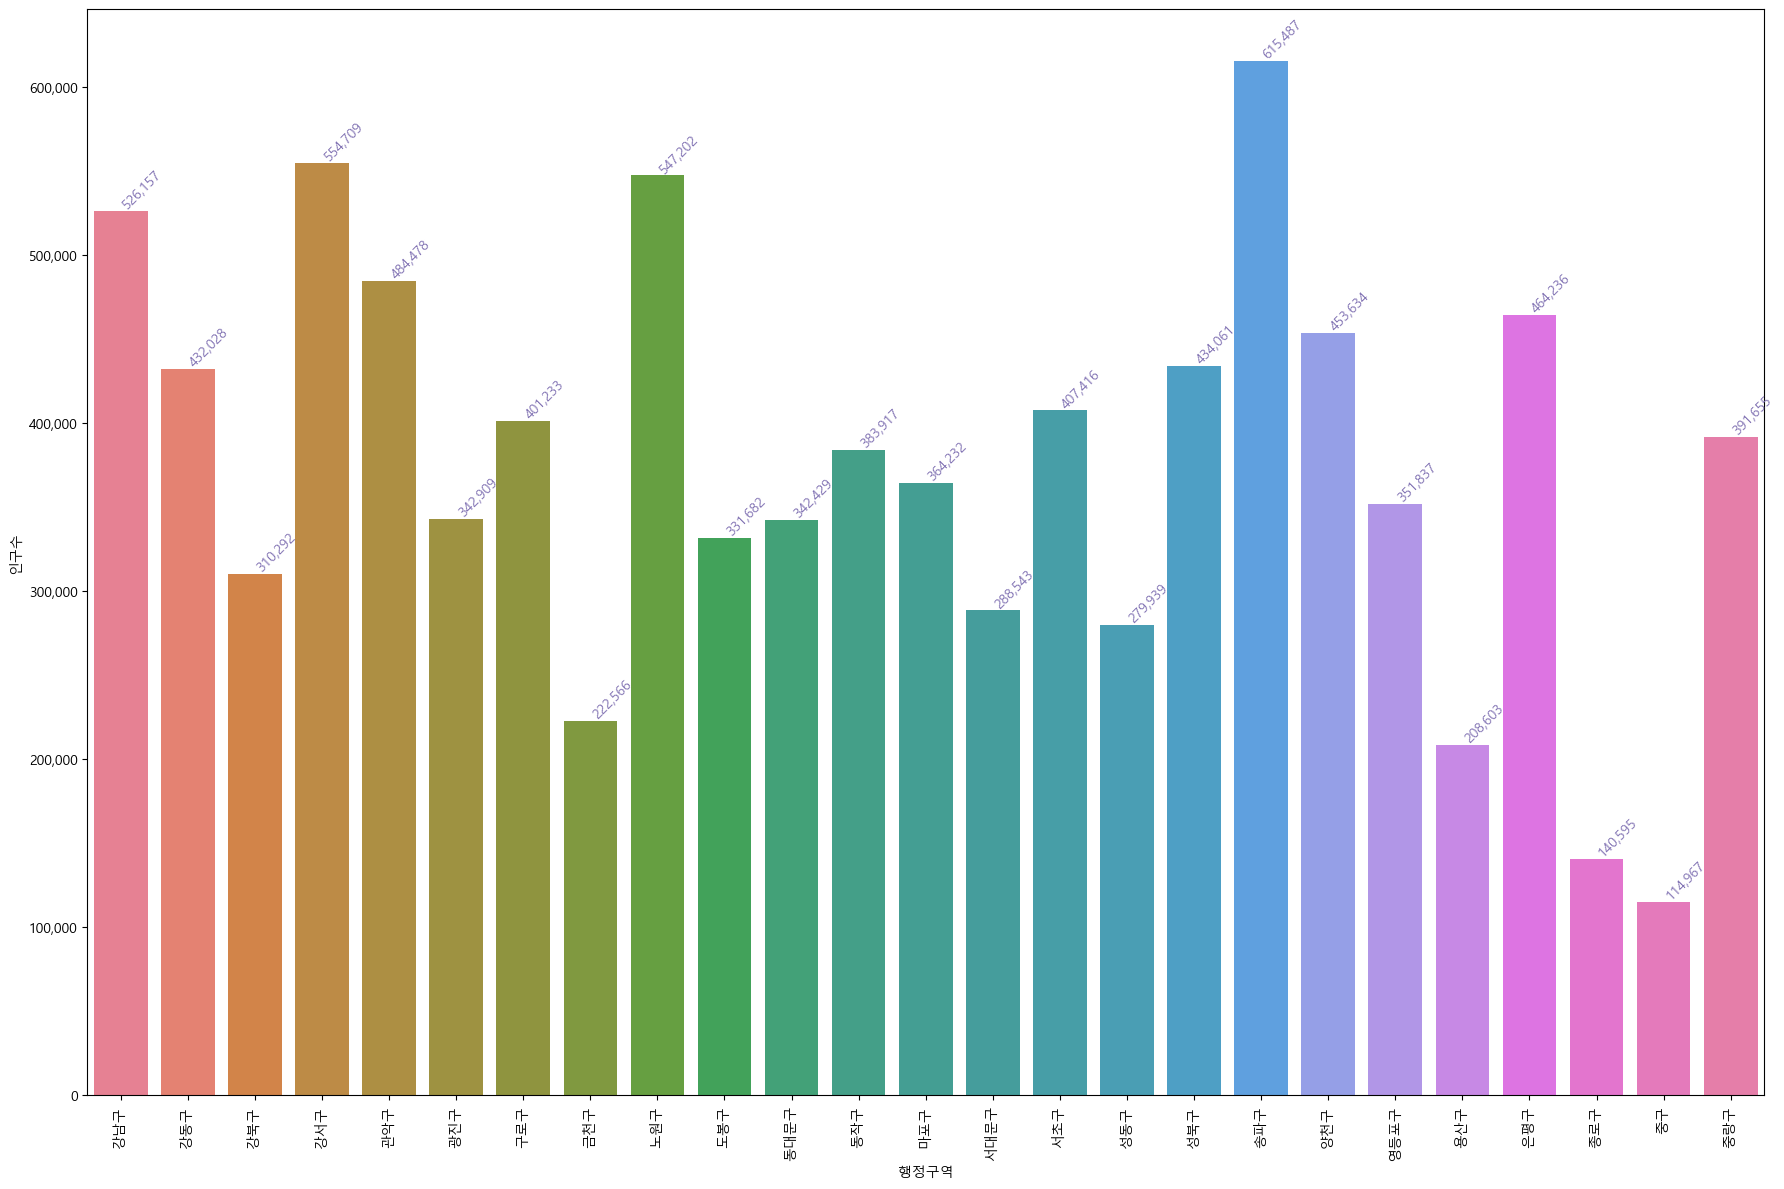

In [ ]:
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18,12)
# sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1,hue='행정구역')

#y축의 label값에 ,(콤마) 출력하기
# ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


# for item in ax1.get_xticklabels(): 
#     item.set_rotation(90)
# for i, v in enumerate(seoul_df["인구수"].items()):
#     ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
# plt.tight_layout()